In [1]:
import pandas as pd

source - https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices

In [2]:
df = pd.read_csv('cab_rides.csv')

In [3]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
df_w = pd.read_csv('weather.csv')

In [5]:
df_w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
df.isna().any()

distance            False
cab_type            False
time_stamp          False
destination         False
source              False
price                True
surge_multiplier    False
id                  False
product_id          False
name                False
dtype: bool

In [7]:
df[df.price.isna()]

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
18,1.11,Uber,1543673584211,West End,North End,NaN,1.0,fa5fb705-03a0-4eb9-82d9-7fe80872f754,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
31,2.48,Uber,1543794776318,South Station,Beacon Hill,NaN,1.0,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
40,2.94,Uber,1543523885298,Fenway,North Station,NaN,1.0,7f47ff53-7cf2-4a6a-8049-83c90e042593,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
60,1.16,Uber,1544731816318,West End,North End,NaN,1.0,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
69,2.67,Uber,1543583283653,Beacon Hill,North End,NaN,1.0,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
...,...,...,...,...,...,...,...,...,...,...
693025,2.50,Uber,1544886913192,Beacon Hill,South Station,NaN,1.0,70ad9983-92dd-4cdf-af16-732e7e9ee9d0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693047,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,NaN,1.0,84e05ef0-781a-4bd5-a593-bbbf659d4ba0,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693049,1.79,Uber,1543456028123,Beacon Hill,North End,NaN,1.0,885ef635-299e-45cf-8052-c45a39e9822a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693060,1.61,Uber,1543728484149,Haymarket Square,Theatre District,NaN,1.0,50a7b6be-ed2a-4a11-8d36-73bd977ad66a,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi


In [8]:
df.merge(df_w, left_on = 'time_stamp', right_on = 'time_stamp')

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind


In [9]:
pd.to_datetime(df['time_stamp'], unit='ms').dt.year.unique()

array([2018], dtype=int64)

In [10]:
pd.to_datetime(df_w['time_stamp'], unit='s')

0      2018-12-16 23:45:01
1      2018-12-16 23:45:01
2      2018-12-16 23:45:01
3      2018-12-16 23:45:01
4      2018-12-16 23:45:01
               ...        
6271   2018-12-03 06:52:54
6272   2018-12-03 06:52:54
6273   2018-12-03 06:52:54
6274   2018-12-03 06:52:54
6275   2018-12-03 06:52:54
Name: time_stamp, Length: 6276, dtype: datetime64[ns]

In [11]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [12]:
df.cab_type.unique()

array(['Lyft', 'Uber'], dtype=object)

In [13]:
df.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [14]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

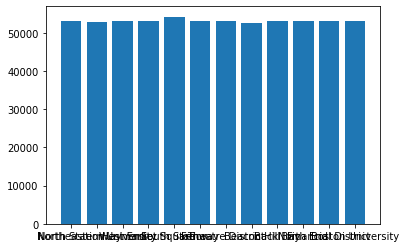

In [15]:
plt.bar(df.destination.unique(), df.groupby('destination').price.count())

<BarContainer object of 12 artists>

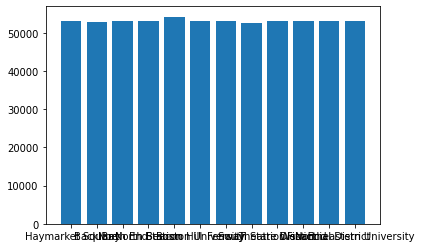

In [16]:
plt.bar(df.source.unique(), df.groupby('source').price.count())

<AxesSubplot:>

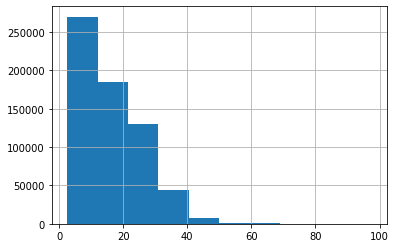

In [17]:
df.price.hist()

In [18]:
import numpy as np

<AxesSubplot:>

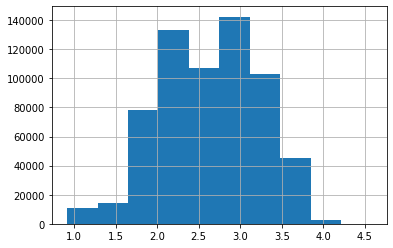

In [19]:
df.price.apply(np.log).hist()

<AxesSubplot:>

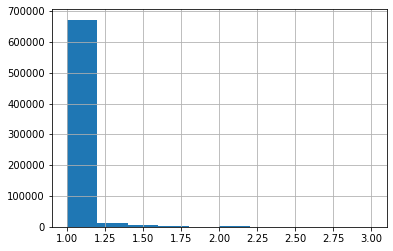

In [20]:
df.surge_multiplier.hist()

In [21]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [22]:
len(df.id.unique())

693071

In [23]:
df.price.count()

637976

In [24]:
df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2',
       '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'], dtype=object)

In [25]:
df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

<BarContainer object of 13 artists>

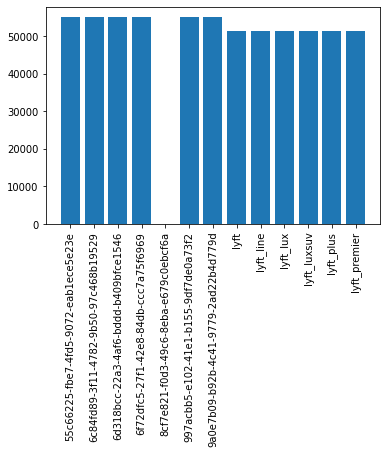

In [26]:
df_filtered = df.groupby('product_id', as_index = False).price.count()
plt.xticks(rotation=90)
plt.bar(df_filtered.product_id, df_filtered.price)

In [27]:
df.groupby('product_id').price.count()

product_id
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
6c84fd89-3f11-4782-9b50-97c468b19529    55095
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a        0
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
lyft                                    51235
lyft_line                               51233
lyft_lux                                51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_premier                            51235
Name: price, dtype: int64

In [28]:
df[df.product_id == '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'].count()

distance            55095
cab_type            55095
time_stamp          55095
destination         55095
source              55095
price                   0
surge_multiplier    55095
id                  55095
product_id          55095
name                55095
dtype: int64

<BarContainer object of 13 artists>

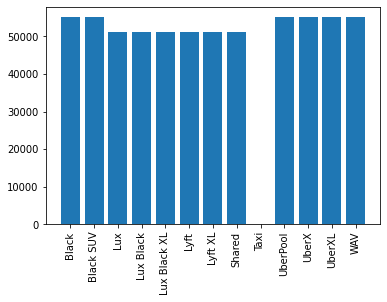

In [29]:
df_filtered = df.groupby('name', as_index = False).price.count()
plt.xticks(rotation=90)
plt.bar(df_filtered.name, df_filtered.price)

In [30]:
df.groupby('name', as_index = False).price.count()

,name,price
0,Black,55095
1,Black SUV,55096
2,Lux,51235
3,Lux Black,51235
4,Lux Black XL,51235
5,Lyft,51235
6,Lyft XL,51235
7,Shared,51233
8,Taxi,0
9,UberPool,55091


In [31]:
df[df.product_id != '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a'].isna().any()

distance            False
cab_type            False
time_stamp          False
destination         False
source              False
price               False
surge_multiplier    False
id                  False
product_id          False
name                False
dtype: bool

In [32]:
df = df[df.product_id != '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

<BarContainer object of 12 artists>

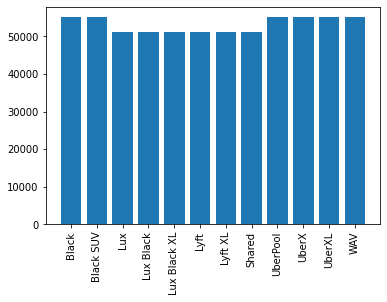

In [33]:
df_filtered = df.groupby('name', as_index = False).price.count()
plt.xticks(rotation=90)
plt.bar(df_filtered.name, df_filtered.price)

<BarContainer object of 12 artists>

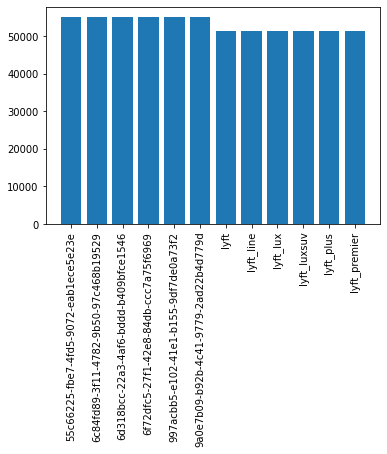

In [34]:
df_filtered = df.groupby('product_id', as_index = False).price.count()
plt.xticks(rotation=90)
plt.bar(df_filtered.product_id, df_filtered.price)

In [35]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


<AxesSubplot:>

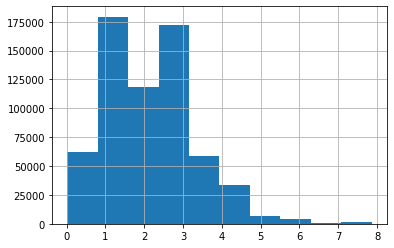

In [36]:
df.distance.hist()

In [37]:
df_w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [38]:
np.sort(df_w.location.unique())

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

In [39]:
np.sort(df.destination.unique())

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

In [40]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [41]:
df['cab_type'] = df.cab_type.astype('category')

In [42]:
df.cab_type.cat.categories

Index(['Lyft', 'Uber'], dtype='object')

In [43]:
df['cab_type_codes'] = df.cab_type.cat.codes

In [44]:
df = df.join(pd.get_dummies(df.destination).add_prefix('destination_'))

In [45]:
df = df.join(pd.get_dummies(df.source).add_prefix('source_'))

In [46]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0,0,0,1,0,0,0,0,0,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0,0,0,1,0,0,0,0,0,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,0,0,0,1,0,0,0,0,0,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0,0,0,1,0,0,0,0,0,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0,0,0,1,0,0,0,0,0,0


In [47]:
pd.set_option('display.max_columns', None)

In [48]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
df = df.join(pd.get_dummies(df.product_id).add_prefix('destination_'))

In [50]:
df = df.join(pd.get_dummies(df.name).add_prefix('destination_'))

In [51]:
len(df.id.unique())

637976

In [52]:
len(df.id)

637976

In [53]:
df = df.drop('id', axis = 1)

In [54]:
df['datetime'] = pd.to_datetime(df['time_stamp'], unit='ms')

In [55]:
df.datetime.dt.weekofyear.unique()

C:\Users\Acer\AppData\Local\Temp/ipykernel_9504/4189222920.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.datetime.dt.weekofyear.unique()


array([50, 48, 51, 49], dtype=int64)

In [56]:
df.datetime.dt.day_of_year.unique()

array([350, 331, 332, 334, 333, 351, 330, 336, 337, 347, 348, 352, 335,
       349, 338, 344, 343], dtype=int64)

In [57]:
df['day'] = df.datetime.dt.day_of_week

In [58]:
df.day.unique()

array([6, 1, 2, 4, 3, 0, 5], dtype=int64)

In [59]:
df.day[:10]

0    6
1    1
2    2
3    4
4    3
5    0
6    0
7    6
8    0
9    1
Name: day, dtype: int64

In [60]:
df.day.apply(lambda x:np.sin(np.pi * 2 * x/7))[:10]

0   -0.781831
1    0.781831
2    0.974928
3   -0.433884
4    0.433884
5    0.000000
6    0.000000
7   -0.781831
8    0.000000
9    0.781831
Name: day, dtype: float64

In [61]:
np.sort(df.day.apply(lambda x:np.sin(np.pi * 2 * x/7)).unique())

array([-0.97492791, -0.78183148, -0.43388374,  0.        ,  0.43388374,
        0.78183148,  0.97492791])

In [62]:
df['day_sin'] = df.day.apply(lambda x:np.sin(np.pi * 2 * x/7))

In [63]:
df_w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [64]:
df_w['datetime'] = pd.to_datetime(df_w['time_stamp'], unit='s')

In [65]:
df_w.datetime.dt.weekofyear.unique()

C:\Users\Acer\AppData\Local\Temp/ipykernel_9504/4187217838.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_w.datetime.dt.weekofyear.unique()


array([50, 48, 49, 51], dtype=int64)

In [66]:
df_w.datetime.dt.day_of_year.unique()

array([350, 331, 333, 348, 330, 337, 349, 351, 352, 335, 332, 344, 347,
       334, 336, 338, 343], dtype=int64)

In [67]:
df.datetime.dt.day_of_year.unique()

array([350, 331, 332, 334, 333, 351, 330, 336, 337, 347, 348, 352, 335,
       349, 338, 344, 343], dtype=int64)

In [68]:
df_w.datetime.dt.hour.unique()

array([23, 19,  0, 11, 17,  9, 10, 18,  2,  3,  5,  4, 12,  7, 14, 20, 16,
       22,  1,  6, 15,  8, 13, 21], dtype=int64)

In [69]:
df.datetime.dt.hour.unique()

array([ 9,  2,  1,  4,  3, 18,  5, 19,  6, 10, 16, 22, 23,  0, 11,  7, 20,
       13, 14,  8, 12, 21, 17, 15], dtype=int64)

In [70]:
df['hour'] = df.datetime.dt.hour

In [71]:
df['week'] = df.datetime.dt.isocalendar().week

In [72]:
df_w['week'] = df_w.datetime.dt.isocalendar().week

In [73]:
df['day_of_year'] = df.datetime.dt.day_of_year

In [74]:
df_w['hour'] = df_w.datetime.dt.hour

In [75]:
df_w['day_of_year'] = df_w.datetime.dt.day_of_year

In [76]:
len(df)

637976

In [77]:
df_w.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime,week,hour,day_of_year
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,50,23,350
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,50,23,350
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,50,23,350
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,50,23,350
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,50,23,350


In [78]:
df_w.isna().any()

temp           False
location       False
clouds         False
pressure       False
rain            True
time_stamp     False
humidity       False
wind           False
datetime       False
week           False
hour           False
day_of_year    False
dtype: bool

In [79]:
df_w[df_w.rain.isna()]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,datetime,week,hour,day_of_year
11,43.28,Back Bay,0.81,990.81,NaN,1543347920,0.71,8.30,2018-11-27 19:45:20,48,19,331
12,43.27,Beacon Hill,0.80,990.80,NaN,1543347920,0.71,8.30,2018-11-27 19:45:20,48,19,331
13,43.35,Boston University,0.82,990.82,NaN,1543347920,0.71,8.24,2018-11-27 19:45:20,48,19,331
14,43.07,Fenway,0.82,990.82,NaN,1543347920,0.72,8.28,2018-11-27 19:45:20,48,19,331
15,43.35,Financial District,0.80,990.80,NaN,1543347920,0.71,8.35,2018-11-27 19:45:20,48,19,331
...,...,...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,2018-12-03 06:52:54,49,6,337
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,49,6,337
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,49,6,337
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06:52:54,49,6,337


In [80]:
df_w['rain_mean'] = df_w[~df_w.rain.isna()].groupby(['datetime']).rain.transform('mean')

In [81]:
from sklearn.metrics import mean_absolute_error

In [82]:
mean_absolute_error(df_w[~df_w.rain.isna()].rain, df_w[~df_w.rain.isna()].rain_mean)

0.007932072555210138

In [83]:
df_w[~df_w.rain.isna()].groupby(['datetime'], as_index = False).rain.mean()

,datetime,rain
0,2018-11-26 13:05:10,0.004000
1,2018-11-26 13:35:10,0.005922
2,2018-11-26 14:05:08,0.002700
3,2018-11-26 14:05:09,0.007478
4,2018-11-26 14:35:08,0.003087
...,...,...
116,2018-12-17 10:45:01,0.002750
117,2018-12-17 11:45:01,0.010429
118,2018-12-17 11:45:02,0.007225
119,2018-12-18 05:45:01,0.025087


In [84]:
df_w['rain_y'] = df_w.merge(df_w[~df_w.rain.isna()].groupby(['week'], as_index = False).rain.mean(), how= 'left', left_on = 'week', right_on = 'week').rain_y

In [85]:
mean_absolute_error(df_w[~df_w.rain.isna()].rain, df_w[~df_w.rain.isna()].rain_y)

0.06399293088331763

In [86]:
df_w[~df_w.rain.isna()].rain.describe()

count    894.000000
mean       0.057652
std        0.100758
min        0.000200
25%        0.004900
50%        0.014850
75%        0.060925
max        0.780700
Name: rain, dtype: float64

<AxesSubplot:>

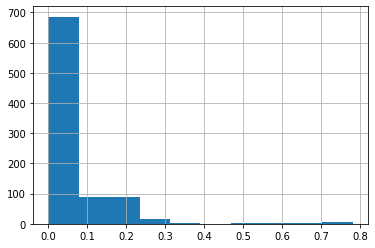

In [87]:
df_w[~df_w.rain.isna()].rain.hist()

In [88]:
df_w = df_w.drop('rain_mean', axis = 1)

In [89]:
df_w_merge = df_w.groupby(['location', 'day_of_year'], as_index = False)[['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']].mean()

In [90]:
df_w_merge

,location,day_of_year,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,330,42.027606,0.957606,1013.255915,0.028170,0.904507,3.605634
1,Back Bay,331,43.360175,0.899649,995.801579,0.106942,0.864737,10.008421
2,Back Bay,332,37.126835,0.540000,992.214684,0.002500,0.731013,7.822658
3,Back Bay,333,38.911563,0.534219,1000.925469,0.002333,0.671719,10.131250
4,Back Bay,334,35.646800,0.290800,1015.540400,NaN,0.711600,3.780800
...,...,...,...,...,...,...,...,...
199,West End,348,33.811667,0.495000,1032.762917,NaN,0.731250,3.026250
200,West End,349,45.946250,0.825833,1022.567917,NaN,0.836250,5.515417
201,West End,350,40.949583,0.692500,1020.198750,0.045767,0.738750,8.285417
202,West End,351,38.240833,0.930833,1004.185833,0.016000,0.858750,9.384583


In [91]:
df_w_merge.groupby('location', as_index = False).rain.transform('mean').isna().any()

rain    False
dtype: bool

In [92]:
df_w_merge.loc[df_w_merge.rain.isna(), 'rain'] = df_w_merge.groupby('location', as_index = False).rain.transform('mean')

In [93]:
df_w_merge.rain.isna().any()

False

In [94]:
#df.join(df_w.set_index(['hour', 'day_of_year']), on = ['hour', 'day_of_year'], how='left')

In [95]:
pd.merge(left = df, right = df_w.groupby(['location', 'day_of_year'], as_index = False)[['temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']].mean().add_prefix('source_'), left_on=['day_of_year', 'source'],right_on=['source_day_of_year', 'source_location'],how='left')

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,datetime,day,day_sin,hour,week,day_of_year,source_location,source_day_of_year,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2018-12-16 09:30:07.890,6,-0.781831,9,50,350,Haymarket Square,350,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2018-11-27 02:00:23.677,1,0.781831,2,48,331,Haymarket Square,331,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2018-11-28 01:00:22.198,2,0.974928,1,48,332,Haymarket Square,332,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-11-30 04:53:02.749,4,-0.433884,4,48,334,Haymarket Square,334,35.638400,0.290000,1015.536800,NaN,0.712400,3.796800
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-11-29 03:49:20.223,3,0.433884,3,48,333,Haymarket Square,333,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018-12-01 23:53:05.534,5,-0.974928,23,48,335,West End,335,36.657778,0.648889,1020.903333,0.000200,0.705556,3.431852
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018-12-01 23:53:05.534,5,-0.974928,23,48,335,West End,335,36.657778,0.648889,1020.903333,0.000200,0.705556,3.431852
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,55c66225-fbe7

In [96]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,datetime,day,day_sin,hour,week,day_of_year
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2018-12-16 09:30:07.890,6,-0.781831,9,50,350
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2018-11-27 02:00:23.677,1,0.781831,2,48,331
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2018-11-28 01:00:22.198,2,0.974928,1,48,332
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-11-30 04:53:02.749,4,-0.433884,4,48,334
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-11-29 03:49:20.223,3,0.433884,3,48,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018-12-01 23:53:05.534,5,-0.974928,23,48,335
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2018-12-01 23:53:05.534,5,-0.974928,23,48,335
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2018-12-01 23:53:05.534,5,-0.974928,23,48,335
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2018-12-01 23:53:05.534,5,-0.974928,23,48,335


In [97]:
df = pd.merge(left = df, right = df_w_merge.add_prefix('source_'), left_on=['day_of_year', 'source'],right_on=['source_day_of_year', 'source_location'],how='left')

In [98]:
df = pd.merge(left = df, right = df_w_merge.add_prefix('destination_'), left_on=['day_of_year', 'destination'],right_on=['destination_day_of_year', 'destination_location'],how='left')

In [99]:
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,datetime,day,day_sin,hour,week,day_of_year,source_location,source_day_of_year,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_location,destination_day_of_year,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2018-12-16 09:30:07.890,6,-0.781831,9,50,350,Haymarket Square,350,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417,North Station,350,40.964167,0.692083,1020.211250,0.046000,0.737500,8.252083
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2018-11-27 02:00:23.677,1,0.781831,2,48,331,Haymarket Square,331,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386,North Station,331,43.314561,0.897719,995.805614,0.115639,0.865614,10.251404
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2018-11-28 01:00:22.198,2,0.974928,1,48,332,Haymarket Square,332,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937,North Station,332,37.095570,0.533291,992.186456,0.002100,0.732278,7.816835
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-11-30 04:53:02.749,4,-0.433884,4,48,334,Haymarket Square,334,35.638400,0.290000,1015.536800,0.026780,0.712400,3.796800,North Station,334,35.618400,0.290000,1015.528400,0.026335,0.712000,3.772400
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-11-29 03:49:20.223,3,0.433884,3,48,333,Haymarket Square,333,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406,North Station,333,38.825313,0.534219,1000.909844,0.001933,0.673594,10.203437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [119]:
df.isna().any()[50:76]

destination_Lux Black XL    False
destination_Lyft            False
destination_Lyft XL         False
destination_Shared          False
destination_UberPool        False
destination_UberX           False
destination_UberXL          False
destination_WAV             False
datetime                    False
day                         False
day_sin                     False
hour                        False
week                        False
day_of_year                 False
source_temp                 False
source_clouds               False
source_pressure             False
source_rain                 False
source_humidity             False
source_wind                 False
destination_temp            False
destination_clouds          False
destination_pressure        False
destination_rain            False
destination_humidity        False
destination_wind            False
dtype: bool

In [101]:
df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'product_id', 'name', 'cab_type_codes',
       'destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End',
       'destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       'destination_6c84fd89-3f11-4782-9b50-97c468b19529',
       'destination

In [102]:
df = df.drop(['destination_day_of_year', 'destination_location', 'source_day_of_year', 'source_location'], axis = 1)

In [103]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,product_id,name,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,datetime,day,day_sin,hour,week,day_of_year,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,lyft_line,Shared,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2018-12-16 09:30:07.890,6,-0.781831,9,50,350,41.034167,0.691667,1020.190833,0.044817,0.735417,8.290417,40.964167,0.692083,1020.211250,0.046000,0.737500,8.252083
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,lyft_premier,Lux,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2018-11-27 02:00:23.677,1,0.781831,2,48,331,43.354561,0.897895,995.805965,0.116542,0.864211,10.154386,43.314561,0.897719,995.805614,0.115639,0.865614,10.251404
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,lyft,Lyft,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2018-11-28 01:00:22.198,2,0.974928,1,48,332,37.106962,0.533038,992.194051,0.002100,0.731899,7.854937,37.095570,0.533291,992.186456,0.002100,0.732278,7.816835
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,lyft_luxsuv,Lux Black XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2018-11-30 04:53:02.749,4,-0.433884,4,48,334,35.638400,0.290000,1015.536800,0.026780,0.712400,3.796800,35.618400,0.290000,1015.528400,0.026335,0.712000,3.772400
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,lyft_plus,Lyft XL,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-11-29 03:49:20.223,3,0.433884,3,48,333,38.865469,0.533750,1000.906562,0.002120,0.672500,10.221406,38.825313,0.534219,1000.909844,0.001933,0.673594,10.203437


In [104]:
df_train = df.drop(['cab_type', 'time_stamp', 'destination', 'source' ,'product_id', 'name', 'datetime', 'week', 'day_of_year', 'day'], axis = 1)

In [105]:
len(df_train)

637976

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('price', axis = 1), df_train.price, test_size = 100000)

<AxesSubplot:>

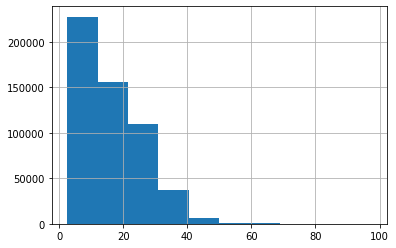

In [108]:
y_train.hist()

<AxesSubplot:>

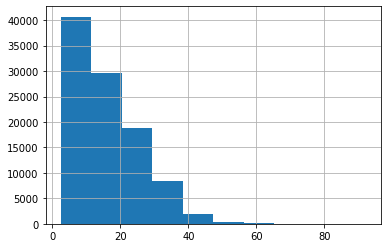

In [109]:
y_test.hist()

<AxesSubplot:>

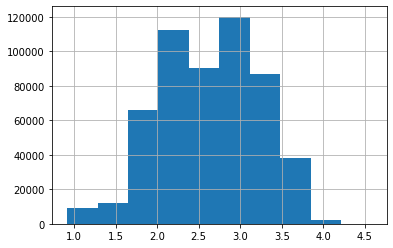

In [120]:
y_train.apply(np.log).hist()

In [121]:
from scipy.stats import normaltest
normaltest(y_train.apply(np.log))

NormaltestResult(statistic=13901.643672922875, pvalue=0.0)

In [122]:
normaltest(y_test.apply(np.log))

NormaltestResult(statistic=2626.758012258453, pvalue=0.0)

In [123]:
df_train.corr()

,distance,price,surge_multiplier,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,day_sin,hour,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
distance,1.000000,0.345061,0.025946,0.001941,-0.027694,0.006648,0.221553,0.179811,0.106124,-0.227888,-0.146415,0.009825,0.119869,-0.153176,-0.070177,-0.019357,-0.055108,-0.040750,0.228895,0.165244,0.139291,-0.283817,-0.153639,0.007809,0.141694,-0.092195,-0.043398,-0.015370,0.000577,0.000579,0.000573,0.000573,0.000578,0.000573,-0.000597,-0.000585,-0.000597,-0.000597,-0.000597,-0.000597,0.000579,0.000573,-0.000597,-0.000597,-0.000597,-0.000597,-0.000597,-0.000585,0.000578,0.000577,0.000573,0.000573,-0.000138,0.002283,-0.004528,0.001227,0.003183,-0.007461,-0.002345,-0.005126,-0.006013,0.001090,0.003212,-0.005152,-0.000110,-0.005345
price,0.345061,1.000000,0.240458,-0.083385,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.223551,0.131185,0.453096,-0.028587,-0.256930,-0.223557,-0.219756,-0.333235,0.206544,0.500057,-0.039163,0.038857,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,-0.256930,-0.223551,-0.028587,-0.223557,0.000616,0.000561,-0.000594,0.001307,0.000772,-0.001327,-0.001282,-0.000560,-0.001053,0.001238,0.000780,0.000303,-0.000630,-0.000566
surge_multiplier,0.025946,0.240458,1.000000,-0.163745,-0.000353,-0.005106,0.004403,0.001332,-0.000253,0.001046,0.002894,-0.000669,0.000278,0.000937,-0.001244,-0.003286,0.044629,0.006232,0.021801,0.025462,-0.009404,-0.040097,-0.040184,-0.030372,0.026088,-0.003967,0.028676,-0.028992,-0.048546,-0.048547,-0.048547,-0.048547,-0.048545,-0.048547,0.071157,-0.046660,0.068468,0.068468,0.071157,0.068468,-0.048547,-0.048547,0.068468,0.068468,0.068468,0.071157,0.071157,-0.046660,-0.048545,-0.048546,-0.048547,-0.048547,0.002812,-0.000067,-0.001514,0.000315,-0.002836,-0.002681,-0.000715,0.002912,-0.000977,-0.000036,-0.002859,0.000883,-0.001531,0.004020
cab_type_codes,0.001941,-0.083385,-0.163745,1.000000,-0.000232,-0.000035,0.000072,-0.000023,-0.001414,0.000084,0.000034,0.000093,-0.000017,-0.000061,0.001056,0.000456,-0.000229,-0.000030,0.000010,-0.000023,-0.001375,-0.000059,0.000004,0.000088,0.000034,-0.000056,0.001190,0.000459,0.296476,0.296479,0.296482,0.296482,0.296467,0.296482,-0.306431,-0.306425,-0.306431,-0.306431,-0.306431,-0.306431,0.296479,0.296482,-0.306431,-0.306431,-0.306431,-0.306431,-0.306431,-0.306425,0.296467,0.296476,0.296482,0.296482,0.001247,-0.001442,-0.001679,0.000481,-0.001169,-0.000388,-0.000052,0.002360,-0.001706,0.0

In [124]:
import seaborn as sns

<AxesSubplot:>

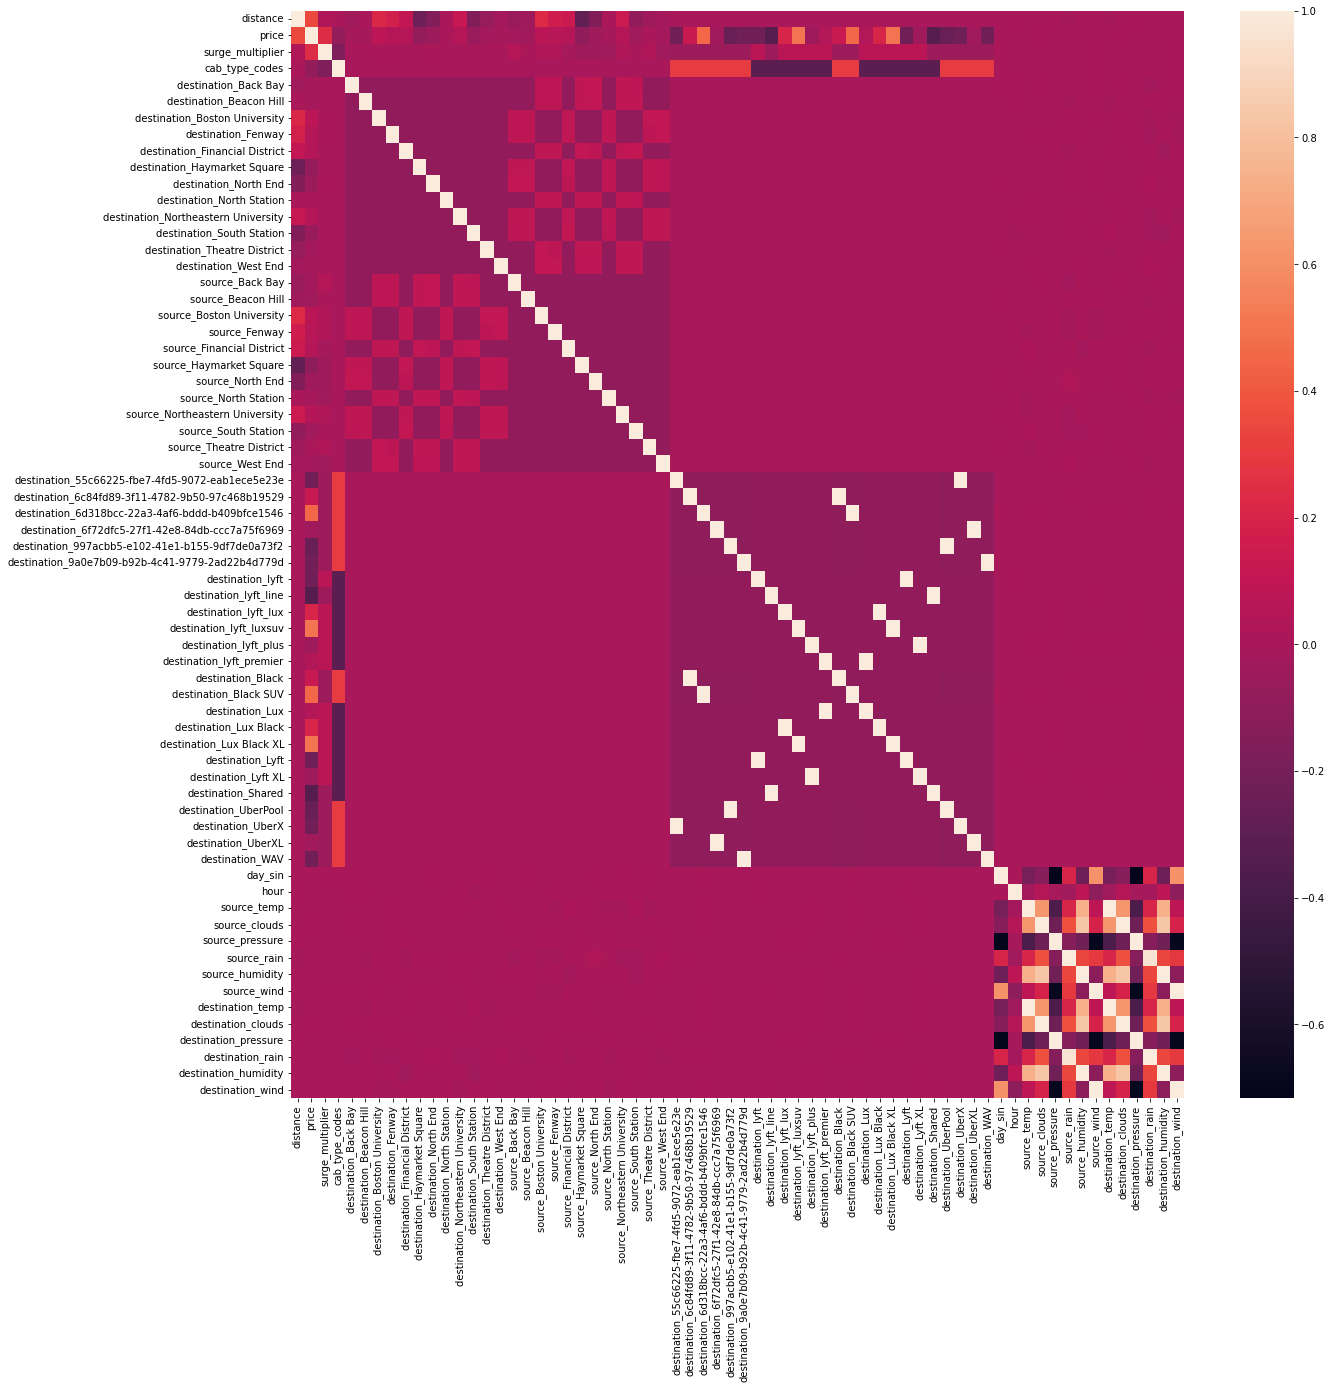

In [125]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df_train.corr())

In [126]:
import statsmodels.api as sm

In [127]:
Xtrain = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:27:42   Log-Likelihood:            -1.2539e+06
No. Observations:              537976   AIC:                         2.508e+06
Df Residuals:                  537927   BIC:                         2.508e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [129]:
from sklearn.linear_model import LassoCV

In [130]:
lasso = LassoCV(random_state = 42)
lasso.fit(X_train, y_train)

LassoCV(random_state=42)

In [131]:
lasso.score(X_train, y_train)

0.9286529512334386

In [132]:
lasso.score(X_test, y_test)

0.9278841171989569

In [134]:
lasso.alpha_

0.0036509278656132018

In [137]:
for feature in range(len(lasso.feature_names_in_)):
    print(lasso.feature_names_in_[feature], lasso.coef_[feature])

distance 2.856238192039056
surge_multiplier 18.05429670615298
cab_type_codes -0.0
destination_Back Bay -4.66678706549295e-05
destination_Beacon Hill -0.29532432697363364
destination_Boston University 0.0
destination_Fenway -0.26889394020556134
destination_Financial District 0.32571689604849996
destination_Haymarket Square 0.12942715527197066
destination_North End 0.0
destination_North Station 0.12040883651022147
destination_Northeastern University 0.0
destination_South Station -0.019785802137297585
destination_Theatre District 0.15647768492770228
destination_West End -0.03862450885322914
source_Back Bay -0.025604387629638112
source_Beacon Hill -0.3327092243567203
source_Boston University -0.21401979091083695
source_Fenway -0.0191351476334397
source_Financial District 0.26374375714894654
source_Haymarket Square 0.2975487067305673
source_North End 0.4789912492167094
source_North Station 0.0
source_Northeastern University -0.2532900546024886
source_South Station 0.12135229428296194
source

In [143]:
feature_importance = pd.DataFrame(columns = ['feature', 'coef'])
for feature in range(len(lasso.feature_names_in_)):
    feature_importance = feature_importance.append({'feature' : lasso.feature_names_in_[feature], 'coef' : lasso.coef_[feature]}, ignore_index=True)

In [144]:
feature_importance

,feature,coef
0,distance,2.856238
1,surge_multiplier,18.054297
2,cab_type_codes,-0.000000
3,destination_Back Bay,-0.000047
4,destination_Beacon Hill,-0.295324
...,...,...
60,destination_clouds,-0.000000
61,destination_pressure,0.000000
62,destination_rain,-0.000000
63,destination_humidity,-0.000000


In [156]:
feature_importance['abs'] = feature_importance.coef.apply(abs)

In [157]:
feature_importance.sort_values(by = 'abs')

,feature,coef,abs
64,destination_wind,0.000000,0.000000
60,destination_clouds,-0.000000,0.000000
30,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.000000,0.000000
63,destination_humidity,-0.000000,0.000000
57,source_humidity,-0.000000,0.000000
...,...,...,...
31,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,-6.858068,6.858068
34,destination_lyft_line,-9.561111,9.561111
29,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,14.047707,14.047707
36,destination_lyft_luxsuv,15.555496,15.555496


In [168]:
feature_importance.sort_values(by = 'abs').set_index('feature')

,coef,abs
feature,,
destination_wind,0.000000,0.000000
destination_clouds,-0.000000,0.000000
destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0.000000,0.000000
destination_humidity,-0.000000,0.000000
source_humidity,-0.000000,0.000000
...,...,...
destination_997acbb5-e102-41e1-b155-9df7de0a73f2,-6.858068,6.858068
destination_lyft_line,-9.561111,9.561111
destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,14.047707,14.047707


<AxesSubplot:ylabel='feature'>

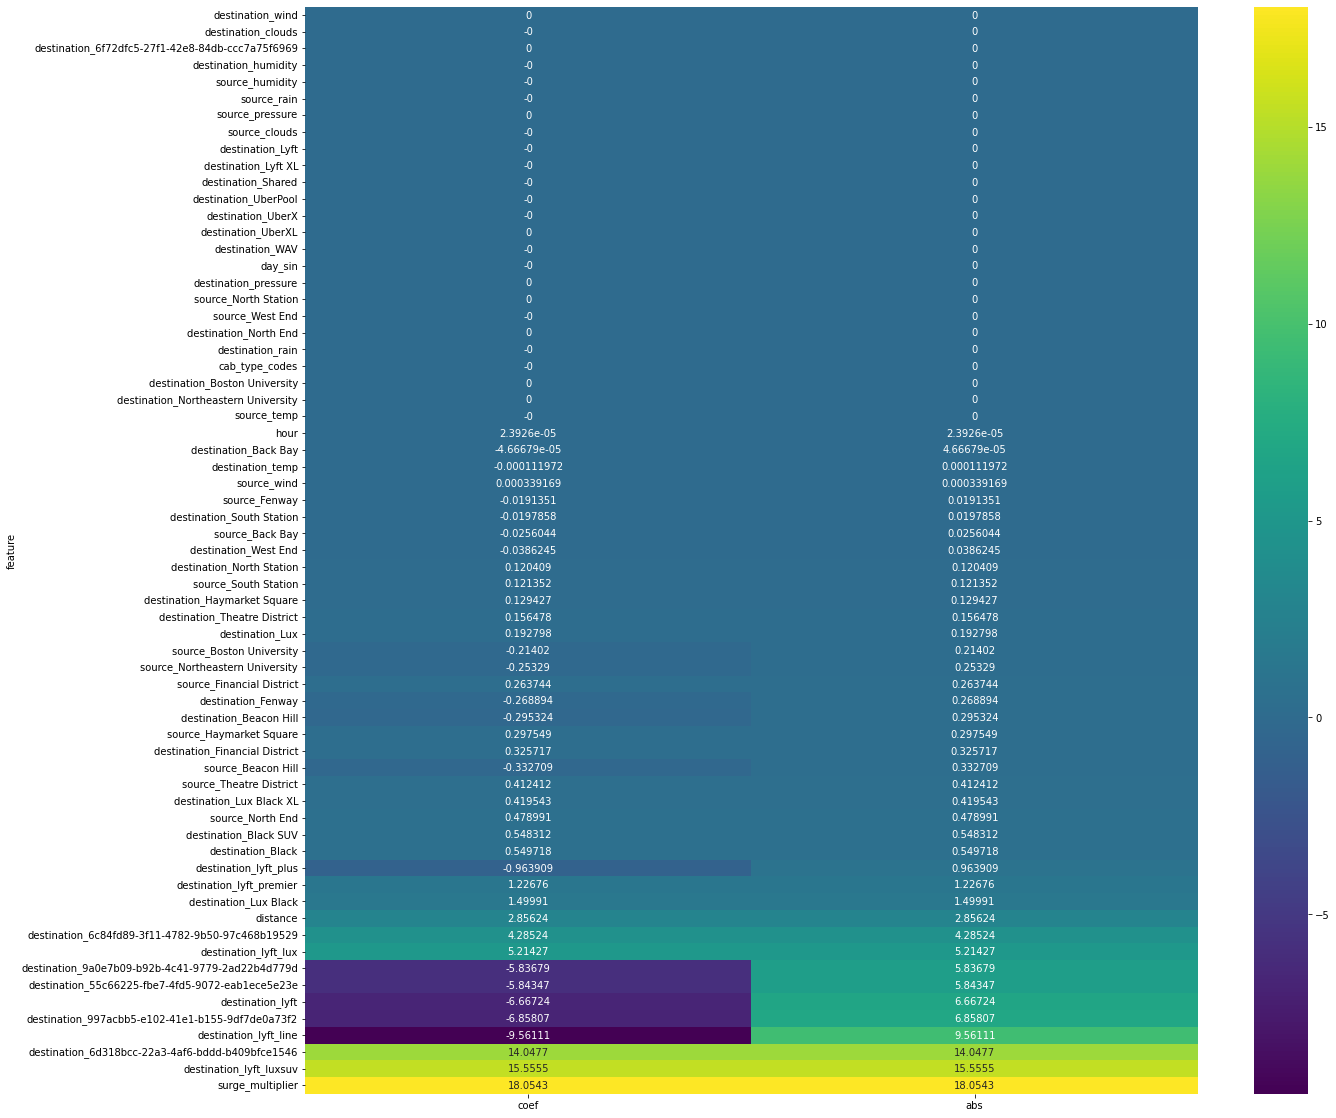

In [169]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(feature_importance.sort_values(by = 'abs').set_index('feature'), annot=True, fmt="g", cmap='viridis')

In [173]:
features = feature_importance[feature_importance['abs'] > 0.01].feature

In [174]:
features

0                                             distance
1                                     surge_multiplier
4                              destination_Beacon Hill
6                                   destination_Fenway
7                       destination_Financial District
8                         destination_Haymarket Square
10                           destination_North Station
12                           destination_South Station
13                        destination_Theatre District
14                                destination_West End
15                                     source_Back Bay
16                                  source_Beacon Hill
17                            source_Boston University
18                                       source_Fenway
19                           source_Financial District
20                             source_Haymarket Square
21                                    source_North End
23                      source_Northeastern University
24        

In [176]:
X_train

,distance,surge_multiplier,cab_type_codes,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL,destination_Lyft,destination_Lyft XL,destination_Shared,destination_UberPool,destination_UberX,destination_UberXL,destination_WAV,day_sin,hour,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
541889,1.63,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.974928,3,46.753333,0.826250,1022.568750,0.002000,0.814167,5.545833,45.946250,0.825833,1022.567917,0.027132,0.836250,5.515417
421168,3.01,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.781831,12,43.314561,0.897719,995.805614,0.115639,0.865614,10.251404,43.336491,0.903333,995.819123,0.092988,0.864211,9.924737
51016,3.07,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.781831,12,40.865417,0.704167,1020.172083,0.046400,0.742083,8.137083,40.964167,0.692083,1020.211250,0.046000,0.737500,8.252083
515622,1.08,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,14,38.386250,0.936250,1004.201667,0.013286,0.854583,9.303750,38.296667,0.928750,1004.172083,0.013700,0.857500,9.274167
22876,3.14,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.974928,17,37.095570,0.533291,992.186456,0.002100,0.732278,7.816835,37.036456,0.541646,992.228481,0.002367,0.732911,7.759494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382421,4.20,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.433884,6,25.238696,0.400000,1031.477826,0.023518,0.576522,3.230000,25.597391,0.394348,1031.483913,0.026693,0.570870,3.340435
322003,0.65,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.433884,20,33.927917,0.495000,1032.779583,0.026780,0.727083,3.037083,33.811667,0.495000,1032.762917,0.027132,0.731250,3.026250
487692,0.29,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.781831,8,43.314561,0.897719,995.805614,0.115639,0.865614,10.251404,43.323509,0.898772,995.808947,0.116139,0.863860,10.138070
197513,2.89,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.433884,19,33.811667,0.495000,1032.762917,0.027132,0.731250,3.026250,33.902500,0.506250,1032.789583,0.025339,0.724583,2.963333


In [175]:
X_train[features]

,distance,surge_multiplier,destination_Beacon Hill,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North Station,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_Northeastern University,source_South Station,source_Theatre District,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL
541889,1.63,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421168,3.01,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51016,3.07,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515622,1.08,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
22876,3.14,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382421,4.20,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
322003,0.65,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
487692,0.29,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
197513,2.89,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [177]:
from sklearn.linear_model import ElasticNetCV

In [178]:
elasticNet = ElasticNetCV(random_state = 42)
elasticNet.fit(X_train[features], y_train)

ElasticNetCV(random_state=42)

In [179]:
elasticNet.score(X_train[features], y_train)

0.9244004339242738

In [180]:
elasticNet.score(X_test[features], y_test)

0.9239561402839181

In [181]:
lasso = LassoCV(random_state = 42)
lasso.fit(X_train[features], y_train)

LassoCV(random_state=42)

In [182]:
lasso.score(X_train[features], y_train)

0.9286532487418656

In [184]:
lasso.score(X_test[features], y_test)

0.9278842525326899

In [187]:
mean_absolute_error(y_train, lasso.predict(X_train[features]))

1.7446420923332377

In [188]:
mean_absolute_error(y_test, lasso.predict(X_test[features]))

1.7481512057707493

In [189]:
df.price.describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [185]:
Xtrain = sm.add_constant(X_train[features])
lin_reg = sm.OLS(y_train, Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+05
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:42:37   Log-Likelihood:            -1.2539e+06
No. Observations:              537976   AIC:                         2.508e+06
Df Residuals:                  537943   BIC:                         2.508e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [186]:
Xtrain = sm.add_constant(X_train[features])
lin_reg = sm.OLS(y_train.apply(np.log), Xtrain).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 2.562e+05
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:43:53   Log-Likelihood:             2.9011e+05
No. Observations:              537976   AIC:                        -5.802e+05
Df Residuals:                  537943   BIC:                        -5.798e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [190]:
lasso = LassoCV(random_state = 42)
lasso.fit(X_train[features], y_train.apply(np.log))

LassoCV(random_state=42)

In [191]:
lasso.score(X_train[features], y_train.apply(np.log))

0.9383520240178617

In [192]:
lasso.score(X_test[features], y_test.apply(np.log))

0.9386537842482133

In [193]:
mean_absolute_error(y_train.apply(np.log), lasso.predict(X_train[features]))

0.09798531068810556

In [194]:
mean_absolute_error(y_test.apply(np.log), lasso.predict(X_test[features]))

0.09797672861510814

In [198]:
(y_train.apply(np.log).apply(np.exp) - y_train).sum()

5.928724178261291e-11

In [200]:
mean_absolute_error(y_train, np.exp(lasso.predict(X_train[features])))

1.439532043308028

In [201]:
mean_absolute_error(y_test, np.exp(lasso.predict(X_test[features])))

1.4413188139903566

In [202]:
from sklearn.linear_model import RidgeCV

In [203]:
from sklearn.linear_model import LinearRegression

In [205]:
linreg = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(random_state = 42)
elasticNet = ElasticNetCV(random_state = 42)

In [206]:
linreg.fit(X_train[features], y_train.apply(np.log))
ridge.fit(X_train[features], y_train.apply(np.log))
lasso.fit(X_train[features], y_train.apply(np.log))
elasticNet.fit(X_train[features], y_train.apply(np.log))

ElasticNetCV(random_state=42)

In [208]:
print('R2 - Train set')
print('Linreg - ', linreg.score(X_train[features], y_train.apply(np.log)))
print('Ridge - ', ridge.score(X_train[features], y_train.apply(np.log)))
print('Lasso - ', lasso.score(X_train[features], y_train.apply(np.log)))
print('ElasticNet - ', elasticNet.score(X_train[features], y_train.apply(np.log)))

R2 - Train set
Linreg -  0.9384283624728651
Ridge -  0.938428997805009
Lasso -  0.9383520240178617
ElasticNet -  0.938292245015184


In [209]:
print('R2 - Test set')
print('Linreg - ', linreg.score(X_test[features], y_test.apply(np.log)))
print('Ridge - ', ridge.score(X_test[features], y_test.apply(np.log)))
print('Lasso - ', lasso.score(X_test[features], y_test.apply(np.log)))
print('ElasticNet - ', elasticNet.score(X_test[features], y_test.apply(np.log)))

R2 - Test set
Linreg -  0.9387424058321691
Ridge -  0.938741936347226
Lasso -  0.9386537842482133
ElasticNet -  0.9386036046305494


In [210]:
print('MAE - Train set')
print('Linreg - ', mean_absolute_error(y_train, np.exp(linreg.predict(X_train[features]))))
print('Ridge - ', mean_absolute_error(y_train, np.exp(ridge.predict(X_train[features]))))
print('Lasso - ', mean_absolute_error(y_train, np.exp(lasso.predict(X_train[features]))))
print('ElasticNet - ', mean_absolute_error(y_train, np.exp(elasticNet.predict(X_train[features]))))

MAE - Train set
Linreg -  1.4399290747440816
Ridge -  1.4399079906770713
Lasso -  1.439532043308028
ElasticNet -  1.4401385269423248


In [211]:
print('MAE - Test set')
print('Linreg - ', mean_absolute_error(y_test, np.exp(linreg.predict(X_test[features]))))
print('Ridge - ', mean_absolute_error(y_test, np.exp(ridge.predict(X_test[features]))))
print('Lasso - ', mean_absolute_error(y_test, np.exp(lasso.predict(X_test[features]))))
print('ElasticNet - ', mean_absolute_error(y_test, np.exp(elasticNet.predict(X_test[features]))))

MAE - Test set
Linreg -  1.4414711035097507
Ridge -  1.4415167727222482
Lasso -  1.4413188139903566
ElasticNet -  1.4418765211645592


In [213]:
size = 30
metrics = np.array([])
for i in range(10000):
    choices = list()
    for choice in range(size):
        choices.append(np.random.randint(low = 0, high = len(X_test)))
    metrics = np.append(metrics, mean_absolute_error(y_test.iloc[choices], np.exp(elasticNet.predict(X_test[features]))[choices]))

In [214]:
metrics = pd.DataFrame(metrics)

In [215]:
metrics.describe()

,0
count,10000.000000
mean,1.435820
std,0.301885
min,0.663402
25%,1.225716
50%,1.399386
75%,1.599933
max,3.235858


In [216]:
from scipy.stats import normaltest
stat, p = normaltest(metrics)

In [217]:
stat

array([1606.61674554])

In [218]:
p

array([0.])

In [219]:
import scipy.stats as st

In [220]:
st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())

(array([0.84413687]), array([2.02750242]))

In [221]:
low = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[0][0]

In [222]:
high = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[1][0]

In [223]:
metrics = metrics.rename({0:'metric'}, axis = 1)

In [224]:
metrics['in_interval'] = metrics['metric'].apply(lambda x : 1 if ((x > low) & (x < high)) else 0)

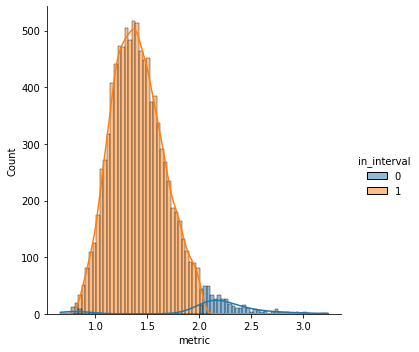

In [225]:
sns.displot(data = metrics, x = 'metric', kde=True, hue = 'in_interval')

In [235]:
feature_importance = pd.DataFrame(columns = ['feature', 'coef'])
for feature in range(len(linreg.feature_names_in_)):
    feature_importance = feature_importance.append({'feature' : linreg.feature_names_in_[feature], 'coef' : linreg.coef_[feature]}, ignore_index=True)

In [236]:
feature_importance

,feature,coef
0,distance,1.744348e-01
1,surge_multiplier,7.005414e-01
2,destination_Beacon Hill,-6.277561e-03
3,destination_Fenway,-1.718419e-02
4,destination_Financial District,-2.669347e-02
5,destination_Haymarket Square,2.281693e-03
6,destination_North Station,-8.572446e-03
7,destination_South Station,-6.994735e-03
8,destination_Theatre District,1.971441e-02
9,destination_West End,-8.884296e-03


In [237]:
feature_importance = pd.DataFrame(columns = ['feature', 'coef'])
for feature in range(len(lasso.feature_names_in_)):
    feature_importance = feature_importance.append({'feature' : lasso.feature_names_in_[feature], 'coef' : lasso.coef_[feature]}, ignore_index=True)

In [238]:
feature_importance

,feature,coef
0,distance,0.172921
1,surge_multiplier,0.676222
2,destination_Beacon Hill,-0.000000
3,destination_Fenway,-0.012441
4,destination_Financial District,-0.018388
5,destination_Haymarket Square,0.000000
6,destination_North Station,-0.000814
7,destination_South Station,-0.004169
8,destination_Theatre District,0.021796
9,destination_West End,-0.001371


In [239]:
df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

In [240]:
df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)

In [226]:
df.price.describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [228]:
X_train[features].head()

,distance,surge_multiplier,destination_Beacon Hill,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North Station,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_Northeastern University,source_South Station,source_Theatre District,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,destination_6c84fd89-3f11-4782-9b50-97c468b19529,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,destination_lyft,destination_lyft_line,destination_lyft_lux,destination_lyft_luxsuv,destination_lyft_plus,destination_lyft_premier,destination_Black,destination_Black SUV,destination_Lux,destination_Lux Black,destination_Lux Black XL
541889,1.63,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
421168,3.01,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51016,3.07,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515622,1.08,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
22876,3.14,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

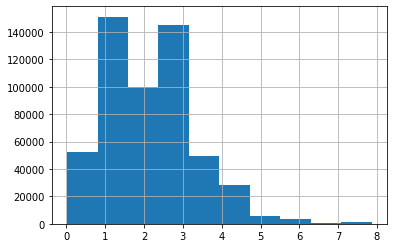

In [231]:
X_train[features].distance.hist()

In [233]:
normaltest(df.distance)

NormaltestResult(statistic=70043.21342513098, pvalue=0.0)

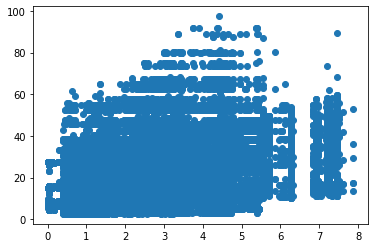

In [234]:
plt.scatter(df.distance, df.price)

In [241]:
feature_importance

,feature,coef
0,distance,0.172921
1,surge_multiplier,0.676222
2,destination_Beacon Hill,-0.000000
3,destination_Fenway,-0.012441
4,destination_Financial District,-0.018388
5,destination_Haymarket Square,0.000000
6,destination_North Station,-0.000814
7,destination_South Station,-0.004169
8,destination_Theatre District,0.021796
9,destination_West End,-0.001371


In [242]:
feature_importance['abs'] = feature_importance.coef.apply(abs)

In [243]:
features = feature_importance[feature_importance['abs'] > 0.01].feature

In [244]:
features

0                                             distance
1                                     surge_multiplier
3                                   destination_Fenway
4                       destination_Financial District
8                         destination_Theatre District
12                            source_Boston University
14                           source_Financial District
16                                    source_North End
18                                source_South Station
19                             source_Theatre District
20    destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e
21    destination_6c84fd89-3f11-4782-9b50-97c468b19529
22    destination_6d318bcc-22a3-4af6-bddd-b409bfce1546
23    destination_997acbb5-e102-41e1-b155-9df7de0a73f2
24    destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d
25                                    destination_lyft
26                               destination_lyft_line
27                                destination_lyft_lux
28        

In [245]:
linreg = LinearRegression()
ridge = RidgeCV()
lasso = LassoCV(random_state = 42)
elasticNet = ElasticNetCV(random_state = 42)

In [246]:
linreg.fit(X_train[features], y_train.apply(np.log))
ridge.fit(X_train[features], y_train.apply(np.log))
lasso.fit(X_train[features], y_train.apply(np.log))
elasticNet.fit(X_train[features], y_train.apply(np.log))

ElasticNetCV(random_state=42)

In [247]:
print('R2 - Train set')
print('Linreg - ', linreg.score(X_train[features], y_train.apply(np.log)))
print('Ridge - ', ridge.score(X_train[features], y_train.apply(np.log)))
print('Lasso - ', lasso.score(X_train[features], y_train.apply(np.log)))
print('ElasticNet - ', elasticNet.score(X_train[features], y_train.apply(np.log)))

R2 - Train set
Linreg -  0.9383686347650251
Ridge -  0.9383686426691499
Lasso -  0.9383137721233628
ElasticNet -  0.9382555469331348


In [248]:
print('R2 - Train set')
print('Linreg - ', linreg.score(X_test[features], y_test.apply(np.log)))
print('Ridge - ', ridge.score(X_test[features], y_test.apply(np.log)))
print('Lasso - ', lasso.score(X_test[features], y_test.apply(np.log)))
print('ElasticNet - ', elasticNet.score(X_test[features], y_test.apply(np.log)))

R2 - Train set
Linreg -  0.9386801678848621
Ridge -  0.9386799167631383
Lasso -  0.9386201722747551
ElasticNet -  0.9385704971859601


In [249]:
print('MAE - Train set')
print('Linreg - ', mean_absolute_error(y_train, np.exp(linreg.predict(X_train[features]))))
print('Ridge - ', mean_absolute_error(y_train, np.exp(ridge.predict(X_train[features]))))
print('Lasso - ', mean_absolute_error(y_train, np.exp(lasso.predict(X_train[features]))))
print('ElasticNet - ', mean_absolute_error(y_train, np.exp(elasticNet.predict(X_train[features]))))

MAE - Train set
Linreg -  1.4417114117702179
Ridge -  1.4417166057624304
Lasso -  1.4407090892247538
ElasticNet -  1.4412606711682001


In [250]:
print('MAE - Train set')
print('Linreg - ', mean_absolute_error(y_test, np.exp(linreg.predict(X_test[features]))))
print('Ridge - ', mean_absolute_error(y_test, np.exp(ridge.predict(X_test[features]))))
print('Lasso - ', mean_absolute_error(y_test, np.exp(lasso.predict(X_test[features]))))
print('ElasticNet - ', mean_absolute_error(y_test, np.exp(elasticNet.predict(X_test[features]))))

MAE - Train set
Linreg -  1.4431979041027216
Ridge -  1.443213456415262
Lasso -  1.4423884780360468
ElasticNet -  1.442894391112687


In [251]:
feature_importance = pd.DataFrame(columns = ['feature', 'coef'])
for feature in range(len(lasso.feature_names_in_)):
    feature_importance = feature_importance.append({'feature' : lasso.feature_names_in_[feature], 'coef' : lasso.coef_[feature]}, ignore_index=True)

In [252]:
feature_importance

,feature,coef
0,distance,1.727028e-01
1,surge_multiplier,6.758329e-01
2,destination_Fenway,-1.073245e-02
3,destination_Financial District,-1.858727e-02
4,destination_Theatre District,2.141040e-02
5,source_Boston University,-1.672062e-02
6,source_Financial District,-2.521255e-02
7,source_North End,3.192285e-02
8,source_South Station,1.354956e-02
9,source_Theatre District,3.042144e-02


In [253]:
feature_importance['abs'] = feature_importance.coef.apply(abs)

<AxesSubplot:ylabel='feature'>

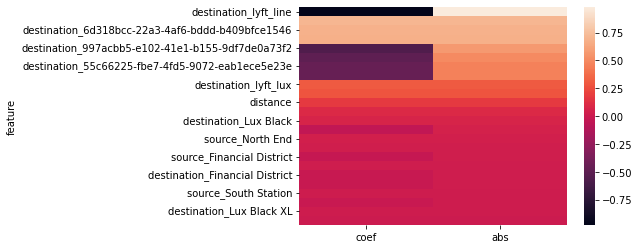

In [256]:
sns.heatmap(feature_importance.set_index('feature').sort_values(by = 'abs', ascending = False))

In [257]:
feature_importance.sort_values(by = 'abs', ascending = False)

,feature,coef,abs
16,destination_lyft_line,-9.760350e-01,9.760350e-01
18,destination_lyft_luxsuv,7.051258e-01,7.051258e-01
12,destination_6d318bcc-22a3-4af6-bddd-b409bfce1546,6.839813e-01,6.839813e-01
1,surge_multiplier,6.758329e-01,6.758329e-01
13,destination_997acbb5-e102-41e1-b155-9df7de0a73f2,-5.677955e-01,5.677955e-01
15,destination_lyft,-5.031790e-01,5.031790e-01
10,destination_55c66225-fbe7-4fd5-9072-eab1ece5e23e,-4.594383e-01,4.594383e-01
14,destination_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,-4.586882e-01,4.586882e-01
17,destination_lyft_lux,2.979873e-01,2.979873e-01
11,destination_6c84fd89-3f11-4782-9b50-97c468b19529,2.796767e-01,2.796767e-01


In [286]:
features = feature_importance.feature.append(pd.Series('price'), ignore_index=True)

<AxesSubplot:>

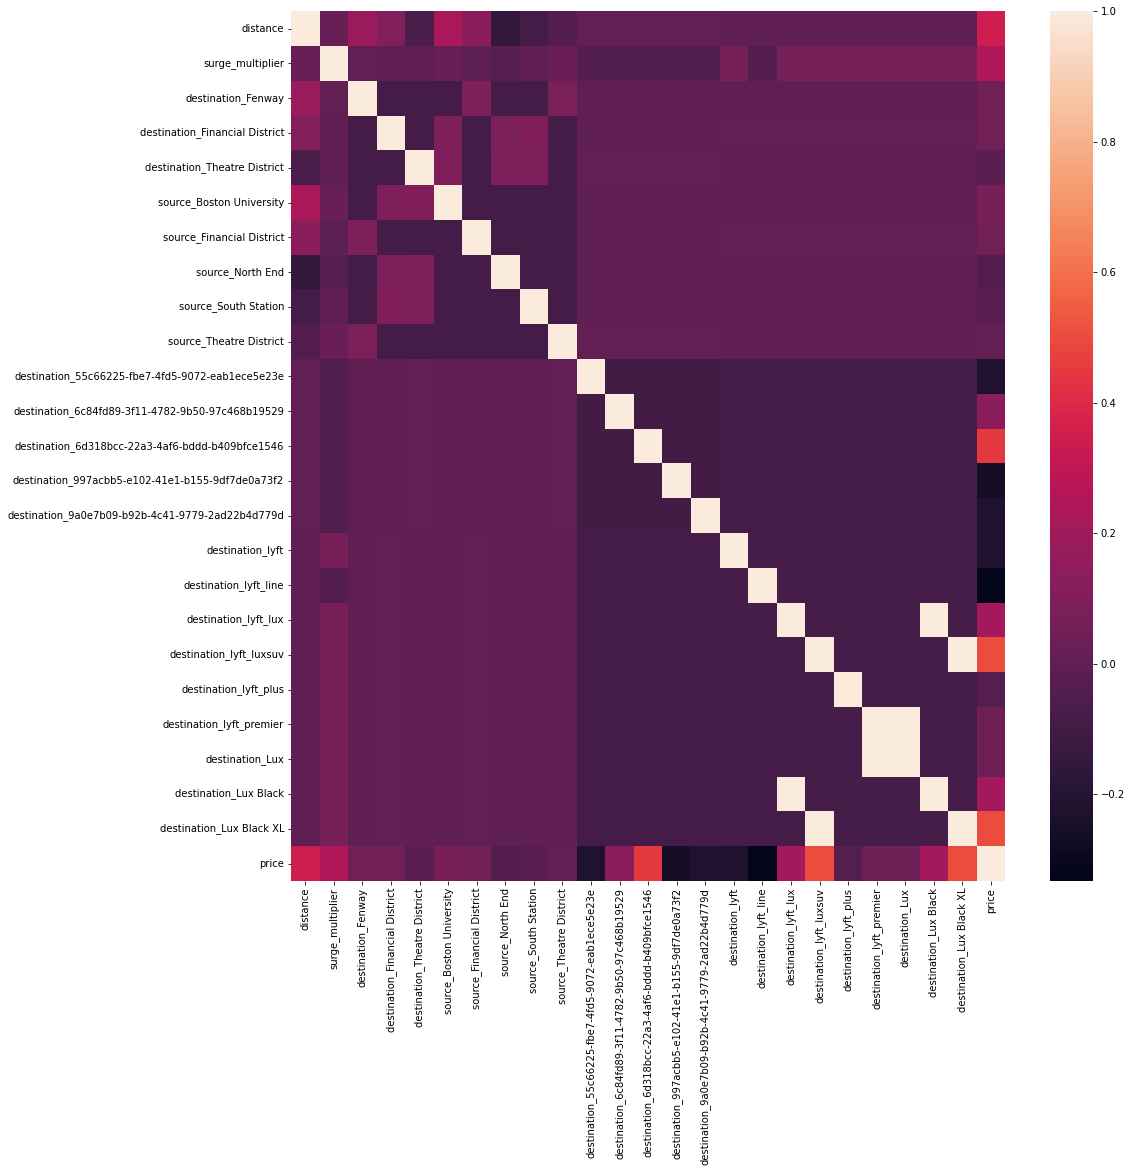

In [287]:
fig, ax = plt.subplots(figsize=(16,16))  
sns.heatmap(df_train[features].corr())

In [260]:
size = 30
metrics = np.array([])
for i in range(10000):
    choices = list()
    for choice in range(size):
        choices.append(np.random.randint(low = 0, high = len(X_test)))
    metrics = np.append(metrics, mean_absolute_error(y_test.iloc[choices], np.exp(elasticNet.predict(X_test[features]))[choices]))

In [261]:
metrics = pd.DataFrame(metrics)

In [262]:
low = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[0][0]
high = st.norm.interval(0.95, loc=metrics.mean(), scale=metrics.std())[1][0]

In [263]:
metrics = metrics.rename({0:'metric'}, axis = 1)
metrics['in_interval'] = metrics['metric'].apply(lambda x : 1 if ((x > low) & (x < high)) else 0)

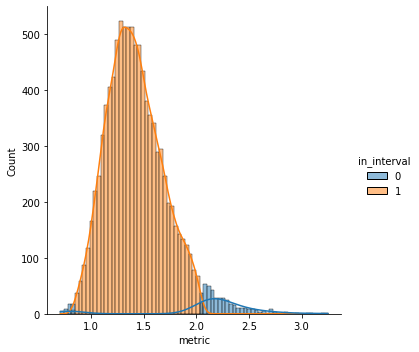

In [264]:
sns.displot(data = metrics, x = 'metric', kde=True, hue = 'in_interval')